In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
mdff = pd.read_csv("datasets/008ExerciseFile.csv")

In [5]:
display(mdff)

,rel_time,m_level
0,-10.000000,166.846602
1,-9.797980,243.656949
2,-9.595960,354.591642
3,-9.393939,209.023218
4,-9.191919,283.431508
...,...,...
95,9.191919,255.174991
96,9.393939,152.987761
97,9.595960,142.685158
98,9.797980,189.684193


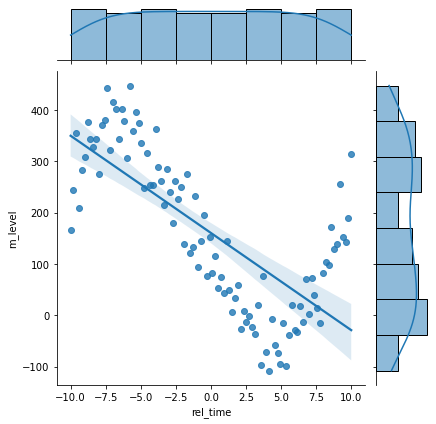

In [44]:
sns.jointplot(data=mdff, x='rel_time', y='m_level', kind = "reg")

So initally, this doesn't seem to be a very good fit. Both variables are not normally distributed as can be seen by the histograms on either side of the graph. Additionally, the error bounds are quite a bit wider then we would like. Let's try a second order. 

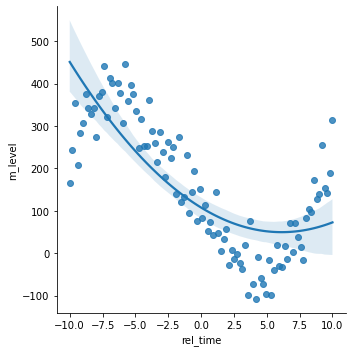

In [47]:
 sns.lmplot(data=mdff, x='rel_time', y='m_level', order=2)

Closer, but still not quite!

<AxesSubplot:xlabel='rel_time', ylabel='m_level'>

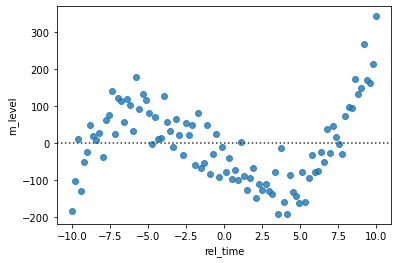

In [7]:
sns.residplot(data=mdff, x='rel_time', y='m_level')

In [6]:
myfit = np.polyfit(x=mdff['rel_time'], y=mdff['m_level'], deg=3)
print(myfit)

[  0.52406776   1.5417871  -50.9901931  107.82613075]


Text(13.585, 0.5, 'Melatonin Level')

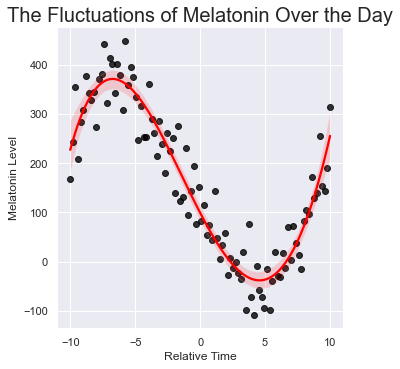

In [65]:
g = sns.lmplot(data=mdff, x='rel_time', y='m_level', order=4, 
          line_kws={'color': 'red'},scatter_kws={"color": "black"})
plt.title('The Fluctuations of Melatonin Over the Day',
         fontsize = 20)
sns.set_theme()
plt.xlabel("Relative Time")
plt.ylabel("Melatonin Level")


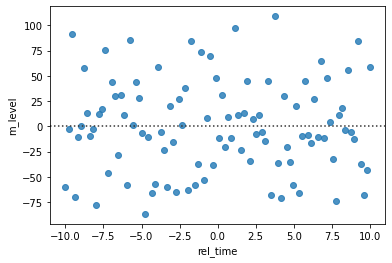

In [28]:
g = sns.residplot(data=mdff, x='rel_time', y='m_level', order=4)

### This plot of the line's residuals seems to support that is is the best fit as the trendline sticks right around zero, with half the residuals falling above the line and the other half below, implying a normal distribution of these residuals.

In [7]:
myfit = np.polyfit(x=mdff['rel_time'], y=mdff['m_level'], deg=4)
print(myfit)

[-9.71767595e-03  5.24067761e-01  2.39127461e+00 -5.09901931e+01
  9.91636881e+01]


In [8]:
fitvals = np.polyval(myfit, mdff['rel_time'])

In [25]:
myres = mdff['m_level'] - fitvals

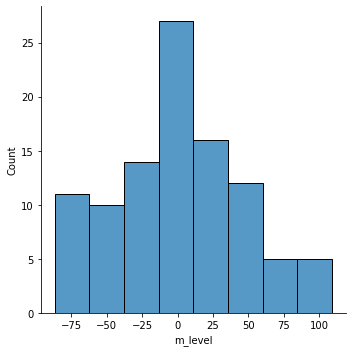

In [26]:
sns.displot(myres)

### This distribution suports the finding from the scatterplot of the residuals, as the histogram shows an approximately normal distribution. This adds futher evidence to support a 4th order line that best fits this data set. 

In [39]:
np.std(myres)

45.38017315987431

### Data can be captured by:

y = (-9.91636881e+01) - (5.09901931e+01)x + 2.4x^2 + 5.2x^3 - 9.7x^4 N(0,45)

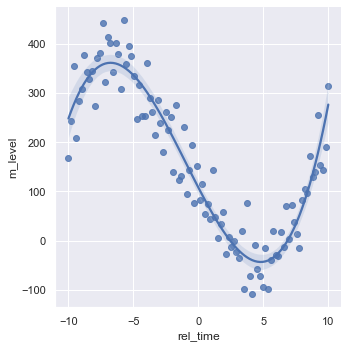

In [67]:
sns.lmplot(data=mdff, x='rel_time', y='m_level', order=3)

In [5]:
myfit = np.polyfit(x=mdff['rel_time'], y=mdff['m_level'], deg=3)
print(myfit)

[  0.52406776   1.5417871  -50.9901931  107.82613075]


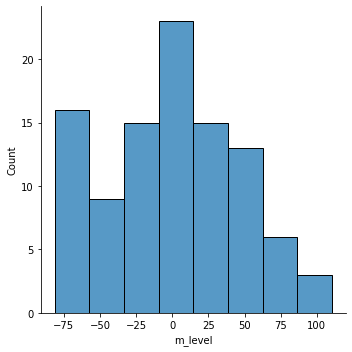

In [6]:
fitvals = np.polyval(myfit, mdff['rel_time'])
myres = mdff['m_level'] - fitvals
sns.displot(myres)

## A third order distribution also seems to work. Both end up producing largely the same distribution and level of fit, but the residuals for a fourth order seem to be more normally distributed when you compare the histograms. Additionally, the error bounds on the the third order scatter plot are slightly wider than those for the fourth order.